In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In C:\Users\JCM\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\JCM\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\JCM\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\JCM\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\JCM\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
Th

In [51]:
df1 = pd.read_csv('onion_forecast.csv')

In [52]:
df2 = pd.read_excel('onion_22-11_09-12.xlsx')

In [53]:
df2['Modal Price (Rs./Quintal)'] = df2['Modal Price (Rs./Quintal)'].apply(lambda x: x/100)

In [54]:
df1['ds'] = pd.to_datetime(df1['ds'])

In [55]:
mask = (df1['ds'] >= '2020-11-23') & (df1['ds'] <= '2020-12-07')
data = df1[mask]
data['ds'] = pd.to_datetime(data['ds'])
df1[mask]

C:\Users\JCM\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ds,yhat,yhat_lower,yhat_upper
2526,2020-11-23,43.258233,32.026600,54.188135
2527,2020-11-24,43.008284,32.382689,53.584856
2528,2020-11-25,42.933870,32.286095,53.222377
2529,2020-11-26,42.440867,31.324224,52.736431
2530,2020-11-27,41.754920,31.344466,52.308395
2531,2020-11-28,41.609947,29.943098,52.186187
2532,2020-11-29,36.878269,26.079915,46.779975
2533,2020-11-30,40.351519,30.121918,51.529621
2534,2020-12-01,40.231620,29.567473,50.217262
2535,2020-12-02,40.296127,29.353025,50.625127


In [56]:
df2.rename(columns={'Price Date':'ds', 'Modal Price (Rs./Quintal)':'price'},inplace=True)

In [57]:
df2 = df2[['ds','price']]

In [64]:
data = data.merge(df2,how='outer')
data

,ds,yhat,yhat_lower,yhat_upper,price
0,2020-11-23,43.258233,32.026600,54.188135,52.5
1,2020-11-24,43.008284,32.382689,53.584856,52.5
2,2020-11-25,42.933870,32.286095,53.222377,52.5
3,2020-11-26,42.440867,31.324224,52.736431,48.5
4,2020-11-27,41.754920,31.344466,52.308395,48.5
5,2020-11-28,41.609947,29.943098,52.186187,48.5
6,2020-11-29,36.878269,26.079915,46.779975,NaN
7,2020-11-30,40.351519,30.121918,51.529621,48.5
8,2020-12-01,40.231620,29.567473,50.217262,48.5
9,2020-12-02,40.296127,29.353025,50.625127,48.5


In [110]:
xlabel = []
for i in data['ds']:
    xlabel.append(str(i)[:-8])

In [82]:
data

,ds,yhat,yhat_lower,yhat_upper,price
0,2020-11-23,43.258233,32.026600,54.188135,52.5
1,2020-11-24,43.008284,32.382689,53.584856,52.5
2,2020-11-25,42.933870,32.286095,53.222377,52.5
3,2020-11-26,42.440867,31.324224,52.736431,48.5
4,2020-11-27,41.754920,31.344466,52.308395,48.5
5,2020-11-28,41.609947,29.943098,52.186187,48.5
6,2020-11-29,36.878269,26.079915,46.779975,NaN
7,2020-11-30,40.351519,30.121918,51.529621,48.5
8,2020-12-01,40.231620,29.567473,50.217262,48.5
9,2020-12-02,40.296127,29.353025,50.625127,48.5


In [124]:
data.iat[6,4] = 48.5
data.iat[11,4] = 48.5
data.iat[13,4] = 42.5

In [135]:
data

,ds,yhat,yhat_lower,yhat_upper,price
0,2020-11-23,43.258233,32.026600,54.188135,52.5
1,2020-11-24,43.008284,32.382689,53.584856,52.5
2,2020-11-25,42.933870,32.286095,53.222377,52.5
3,2020-11-26,42.440867,31.324224,52.736431,48.5
4,2020-11-27,41.754920,31.344466,52.308395,48.5
5,2020-11-28,41.609947,29.943098,52.186187,48.5
6,2020-11-29,36.878269,26.079915,46.779975,48.5
7,2020-11-30,40.351519,30.121918,51.529621,48.5
8,2020-12-01,40.231620,29.567473,50.217262,48.5
9,2020-12-02,40.296127,29.353025,50.625127,48.5


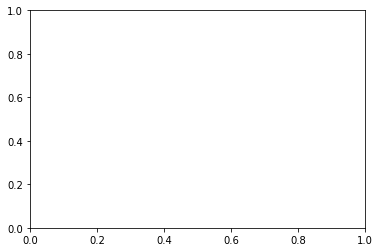

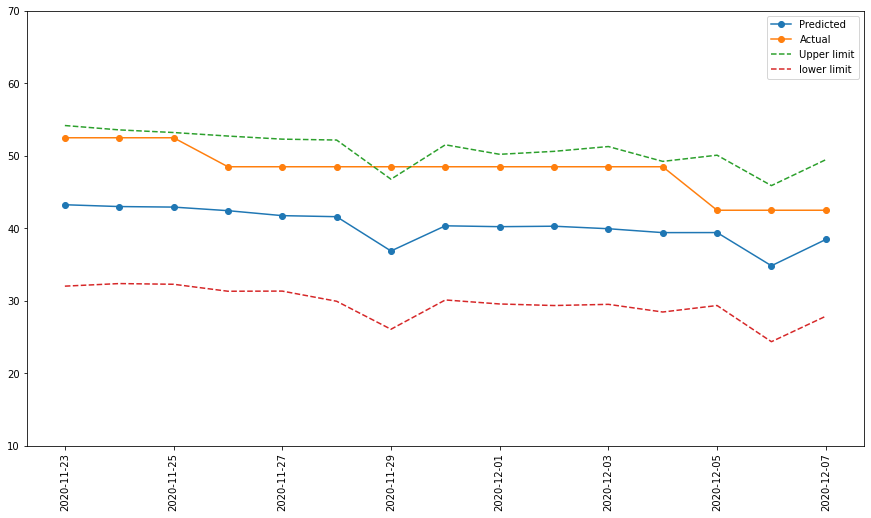

In [149]:
fig, ax = plt.subplots()
plt.figure(figsize=(15,8))
plt.plot(data['ds'],data['yhat'],'-o',label='Predicted')
plt.plot(data['ds'],data['price'],'-o',label='Actual')
plt.plot(data['ds'],data['yhat_upper'],'--',label='Upper limit')
plt.plot(data['ds'],data['yhat_lower'],'--',label='lower limit')
plt.xticks(rotation=90)
plt.ylim(10,70)
plt.legend()
plt.show()

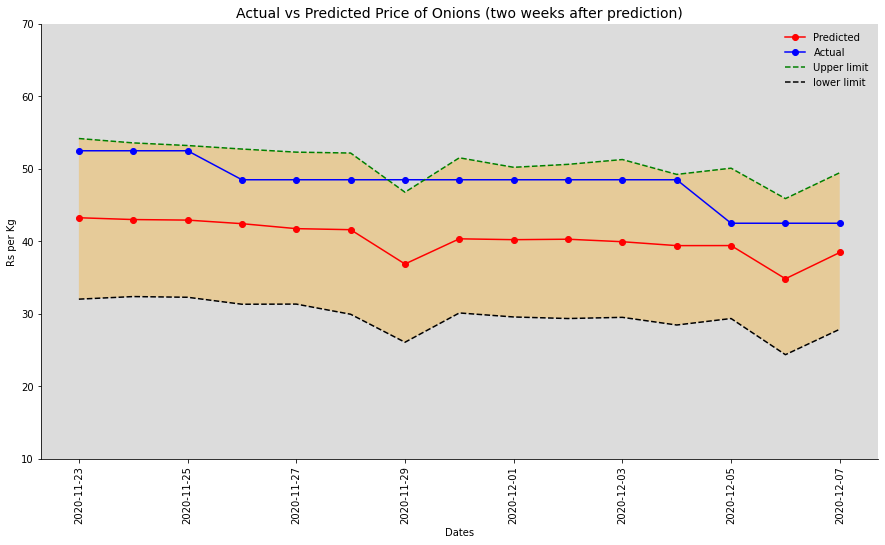

In [174]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(data['ds'],data['yhat'],'-o',color ='red',label='Predicted')
ax.plot(data['ds'],data['price'],'-o',color ='blue',label='Actual')
ax.plot(data['ds'],data['yhat_upper'],'--', color ='green',label='Upper limit')
ax.plot(data['ds'],data['yhat_lower'],'--', color ='black',label='lower limit')
ax.fill_between(xlabel,data['yhat_upper'],data['yhat_lower'],
                where=data['yhat_upper'] > data['yhat_lower'],
               facecolor ='orange', alpha = 0.3)
ax.set_ylim([10,70])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_facecolor('gainsboro')
plt.xticks(rotation=90)
plt.legend(frameon=False)
plt.xlabel('Dates')
plt.ylabel('Rs per Kg')
plt.title('Actual vs Predicted Price of Onions (two weeks after prediction)', fontsize=14)
plt.show()